# Safari Challenge

In this challenge, you must use what you've learned to train a convolutional neural network model that classifies images of animals you might find on a safari adventure.

## Explore the data

The training images you must use are in the **/safari/training** folder. Run the cell below to see an example of each image class, and note the shape of the images (which indicates the dimensions of the image and its color channels).

In [26]:
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import confusion_matrix
%matplotlib inline

# The images are in the safari/training folder
data_path = "safari/training"

Libraries imported and dataset loaded


In [2]:
# Get the class names
classes = os.listdir(data_path)
classes.sort()
print(len(classes), 'classes:')
print(classes)

4 classes:
['elephant', 'giraffe', 'lion', 'zebra']


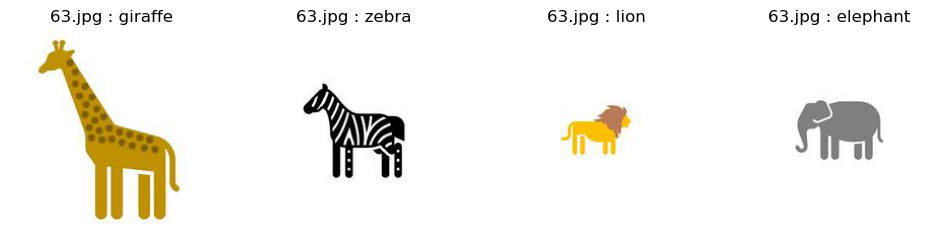

In [38]:
# Show the first image in each folder
fig = plt.figure(figsize=(12, 12))#sets the size of the figure to 12x12 inches using the figsize parameter
i = 0
for sub_dir in os.listdir(data_path): #starts a loop that iterates over each item (subdirectory) in the list of directories within the data_path directory,
    i+=1
    img_file = os.listdir(os.path.join(data_path,sub_dir))[0]
    img_path = os.path.join(data_path, sub_dir, img_file)
    img = mpimg.imread(img_path) #The image data is stored in the variable img
    img_shape = np.array(img).shape 
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(img_file + ' : ' + str(sub_dir))

plt.show()

zebra


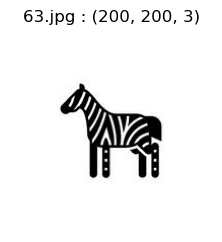

In [35]:
fig = plt.figure(figsize=(12, 12))#sets the size of the figure to 12x12 inches using the figsize parameter

# with specific name in the class
target_class = 'zebra'
i = 0
for sub_dir in os.listdir(data_path):
    if sub_dir == target_class:
        i += 1
        img_file = os.listdir(os.path.join(data_path, sub_dir))[0]
        img_path = os.path.join(data_path, sub_dir, img_file)
        img = mpimg.imread(img_path)
        img_shape = img.shape
        a = fig.add_subplot(1, len(classes), i)
        a.axis('off')
        imgplot = plt.imshow(img)
        a.set_title(img_file + ' : ' + str(img_shape))
        print(sub_dir)
plt.show()

Now that you've seen the images, use your preferred framework (PyTorch or TensorFlow) to train a CNN classifier for them. Your goal is to train a classifier with a validation accuracy of 95% or higher.

Add cells as needed to create your solution.

### Install and import TensorFlow

In [5]:
#%pip install --upgrade tensorflow

In [6]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define a CNN classifier network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

2023-05-17 11:39:26.026692: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Define CNN
Below are some suggested steps to follow or you can use your own steps to define your CNN.

In [19]:
img_size = (200,200)
batch_size = 30

datagen = ImageDataGenerator(rescale=1./255,validation_split=0.3)
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data
validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data


# Define the model as a sequence of layers
model = Sequential()

# The input layer accepts an image and applies a convolution that uses 32 6x6 filters and a rectified linear unit activation function
model.add(Conv2D(32, (6, 6), input_shape=train_generator.image_shape, activation='relu'))

# Next we'll add a max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2,2)))

# We can add as many layers as we think necessary - here we'll add another convolution and max pooling layer
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# And another set
model.add(Conv2D(32, (6, 6), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# A dropout layer randomly drops some nodes to reduce inter-dependencies (which can cause over-fitting)
model.add(Dropout(0.2))

# Now we'll flatten the feature maps and generate an output layer with a predicted probability for each class
model.add(Flatten())
model.add(Dense(train_generator.num_classes, activation='softmax'))

# With the layers defined, we can now compile the model for categorical (multi-class) classification
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print(model.summary())

Found 283 images belonging to 4 classes.
Found 119 images belonging to 4 classes.
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 195, 195, 32)      3488      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 97, 97, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 92, 92, 32)        36896     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 46, 46, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 41, 41, 32)        36896     
                                      

### Train the model
Train a CNN model with 10 epochs.

In [32]:
# Your Code to train a CNN model...
num_epochs = 5
history = model.fit(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Epoch 1/10
9/9 [==============================] - 23s 2s/step - loss: 1.3764 - accuracy: 0.3439 - val_loss: 0.9731 - val_accuracy: 0.7667
Epoch 2/10
9/9 [==============================] - 21s 2s/step - loss: 0.7655 - accuracy: 0.6719 - val_loss: 0.7339 - val_accuracy: 0.4667
Epoch 3/10
9/9 [==============================] - 22s 2s/step - loss: 0.4056 - accuracy: 0.8300 - val_loss: 0.2424 - val_accuracy: 0.9778
Epoch 4/10
9/9 [==============================] - 22s 2s/step - loss: 0.1219 - accuracy: 0.9842 - val_loss: 0.0397 - val_accuracy: 1.0000
Epoch 5/10
9/9 [==============================] - 21s 2s/step - loss: 0.0250 - accuracy: 1.0000 - val_loss: 0.0112 - val_accuracy: 1.0000
Epoch 6/10
9/9 [==============================] - 24s 3s/step - loss: 0.0064 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7/10
9/9 [==============================] - 21s 2s/step - loss: 0.0044 - accuracy: 1.0000 - val_loss: 0.0110 - val_accuracy: 1.0000
Epoch 8/10
9/9 [==================

### View loss history
- To check for overfitting.

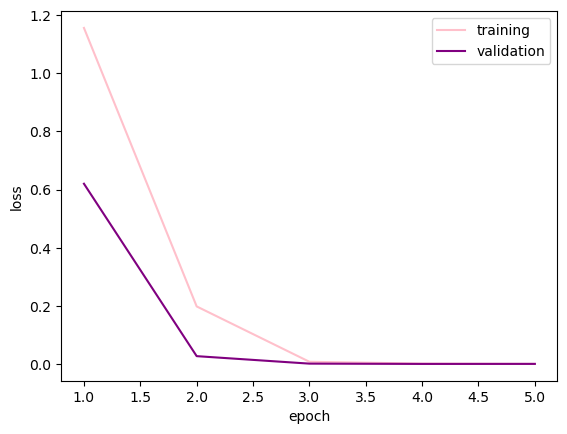

In [25]:
epoch_nums = range(1, num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss, color='Pink')
plt.plot(epoch_nums, validation_loss, color='Purple')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

### Evaluate the model

Generating predictions from validation data...
1/1 [==============================] - 1s 602ms/step


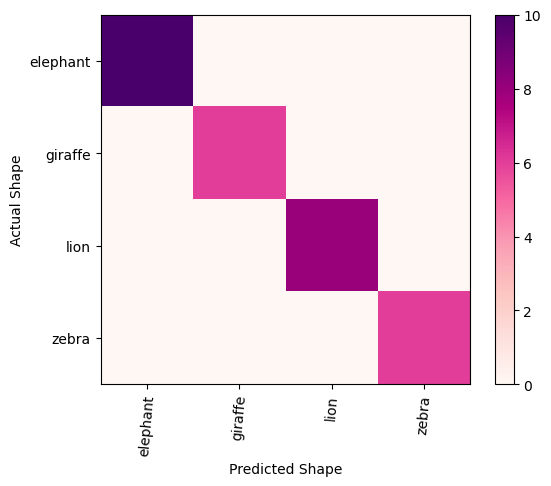

In [11]:
classnames = list(train_generator.class_indices.keys())

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the model to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.RdPu)
plt.colorbar()
tick_marks = np.arange(len(classnames))
plt.xticks(tick_marks, classnames, rotation=85)
plt.yticks(tick_marks, classnames)
plt.xlabel("Predicted Shape")
plt.ylabel("Actual Shape")
plt.show()

### Save your model

Add code below to save your model's trained weights.

In [12]:
# Save the trained model
modelFileName = 'safari_adventure_animal_classifier.h5'
model.save(modelFileName)
del model  # deletes the existing model variable
print('The model has been saved as', modelFileName)

The model has been saved as safari_adventure_animal_classifier.h5


### Use the trained model

Now that we've trained your model, modify the following code as necessary to use it to predict the classes of the provided test images.

1/1 [==============================] - 0s 49ms/step
giraffe.jpg


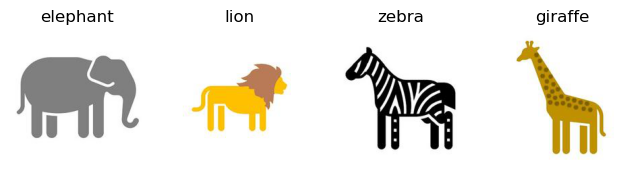

In [40]:
# Your code here
# Function to predict the class of an image
def predict_image(classifier, image):
    from tensorflow import convert_to_tensor
    # The model expects a batch of images as input, so we'll create an array of 1 image
    imgfeatures = img.reshape(1, img.shape[0], img.shape[1], img.shape[2])

    # We need to format the input to match the training data
    # The generator loaded the values as floating point numbers
    # and normalized the pixel values, so...
    imgfeatures = imgfeatures.astype('float32')
    imgfeatures /= 255
    
    # Use the model to predict the image class
    class_probabilities = classifier.predict(imgfeatures)
    
    # Find the class predictions with the highest predicted probability
    index = int(np.argmax(class_probabilities, axis=1)[0])
    return index


# Load your model
model = models.load_model(modelFileName) # loads the saved model

# The images are in the data/shapes folder
test_data_path = 'safari/test'

# Show the test images with predictions
fig = plt.figure(figsize=(8, 12))
i = 0
for img_file in os.listdir(test_data_path):
    i+=1
    img_path = os.path.join(test_data_path, img_file)
    img = mpimg.imread(img_path)
    # Get the image class prediction
    index = predict_image(model, np.array(img))
    a=fig.add_subplot(1, len(classes),i)
    a.axis('off')
    imgplot = plt.imshow(img)
    a.set_title(classes[index])
plt.show()